## Interactuar con arduino desde un Notebook

AVISO DE CHAPUZA SUPREMA

Primero, abrimos la vía de comunicación

In [1]:
import serial
import datetime

In [3]:
ser = serial.Serial('COM4', 9600)

#Linux: ser = serial.Serial('/dev/ttyACM0', 9600)

Con la función readline() podemos leer, y con decode la dejamos más bonita

In [4]:
for i in range(100):
    print(ser.readline().decode("utf-8") )

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.24

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.24

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.00

esperando

mode escucha

Medida: 85.24

esperando

mode escucha

Medida: 85.24

esperando

mode escucha

Medida: 85.24

esperando

mode escucha

Medida: 85.24

esperando

mode escucha

Medida: 85.24

esperando

mode escucha

Medida: 85.24

esperando

mode escucha



Podemos también escribir!

In [ ]:
ser.write(b'50')

Para lo siguiente, tendremos que cortar la comunicación

In [5]:
ser.close()

Hagamos cosas de verdad

In [ ]:
ser = serial.Serial('COM4', 9600) #Iniciamos comunicación

print('preparado')
for i in range(3):
    print(ser.readline().decode("utf-8") ) #Espera hasta que empiece a comunicarse
# -----------------------------------
ser.write(b'50') #Enviamos una orden
print('mensaje enviado\r\n')
for i in range(2):
    print(ser.readline().decode("utf-8") ) #Leemos un par de veces para limpiar el puerto por si acaso

for i in range(100): #Leemos hasta que pase a 'Esperando', o hasta que termine
    if ser.readline() == b'esperando\r\n':
        print('esperando\r\n')
        print(ser.readline().decode("utf-8") )
        print(ser.readline().decode("utf-8") )
        break
    print(ser.readline().decode("utf-8") )
#------------------------------------
print('pasando a segunda orden\r\n')    
ser.write(b'150')
for i in range(3):
    print(ser.readline().decode("utf-8") )
time.sleep(2)
for i in range(100):
    if ser.readline() == b'esperando\r\n':
        print('esperando\r\n')
        print(ser.readline().decode("utf-8") )
        print(ser.readline().decode("utf-8") )
        break
    print(ser.readline().decode("utf-8") )
ser.close()

Un poco más avanzado!

In [15]:
tiempos = []
posiciones =[]
starttime = datetime.datetime.now()

ser = serial.Serial('COM4', 9600) #Iniciamos comunicación

print('preparado')
for i in range(3):
    lectura = ser.readline().decode("utf-8")
    print(lectura) #Espera hasta que empiece a comunicarse
    if lectura[:8] == 'Medida: ':
        tiempo = datetime.datetime.now()
        deltat = tiempo - starttime
        deltatvalue = deltat.seconds + deltat.microseconds/1000000
        tiempos.append(deltatvalue)
        medida = float(lectura[8:])
        posiciones.append(medida)
# -----------------------------------
ser.write(b'50') #Enviamos una orden
print('mensaje enviado\r\n')
for i in range(2):
    print(ser.readline().decode("utf-8") ) #Leemos un par de veces para limpiar el puerto por si acaso

for i in range(100): #Leemos hasta que pase a 'Esperando', o hasta que termine
    lectura = ser.readline().decode("utf-8")
    print(lectura) 
    if lectura == 'esperando\r\n':
        print(ser.readline().decode("utf-8") )
        print(ser.readline().decode("utf-8") )
        break
    if lectura[:8] == 'moviendo':
        _pos = lectura.find('posicion') + 10
        _pos2 = lectura.find(' ',_pos )
        medida = float(lectura[_pos : _pos2])
        posiciones.append(medida)
        tiempo = datetime.datetime.now()
        deltat = tiempo - starttime
        deltatvalue = deltat.seconds + deltat.microseconds/1000000
        tiempos.append(deltatvalue)
   
#------------------------------------
print('pasando a segunda orden\r\n')    
ser.write(b'150')
for i in range(4):
    lectura = ser.readline().decode("utf-8")
    print(lectura) #Espera hasta que empiece a comunicarse
    if lectura[:8] == 'Medida: ':
        tiempo = datetime.datetime.now()
        deltat = tiempo - starttime
        deltatvalue = deltat.seconds + deltat.microseconds/1000000
        tiempos.append(deltatvalue)
        medida = float(lectura[8:])
        posiciones.append(medida)
for i in range(100):
    lectura = ser.readline().decode("utf-8")
    print(lectura) 
    if lectura == 'esperando\r\n':
        print(ser.readline().decode("utf-8") )
        print(ser.readline().decode("utf-8") )
        break
    if lectura[:8] == 'moviendo':
        _pos = lectura.find('posicion') + 10
        _pos2 = lectura.find(' ',_pos )
        medida = float(lectura[_pos : _pos2])
        posiciones.append(medida)
        tiempo = datetime.datetime.now()
        deltat = tiempo - starttime
        deltatvalue = deltat.seconds + deltat.microseconds/1000000
        tiempos.append(deltatvalue)
ser.close()

preparado
Medida: 84.79

esperando

mode escucha

mensaje enviado

Medida: 84.79

moviendo a 50

moviendo a 50.00 posicion: 83.50 velocidad: -0.20

moviendo a 50.00 posicion: 77.71 velocidad: -0.40

moviendo a 50.00 posicion: 68.50 velocidad: -0.60

moviendo a 50.00 posicion: 58.21 velocidad: -0.40

moviendo a 50.00 posicion: 51.79 velocidad: -0.20

moviendo a 50.00 posicion: 49.64 velocidad: -0.00

moviendo a 50.00 posicion: 49.64 velocidad: 0.01

mode escucha

Medida: 49.64

esperando

mode escucha

Medida: 49.64

pasando a segunda orden

esperando

mode escucha

Medida: 49.64

moviendo a 150

moviendo a 150.00 posicion: 50.19 velocidad: 0.19

moviendo a 150.00 posicion: 55.56 velocidad: 0.39

moviendo a 150.00 posicion: 65.23 velocidad: 0.59

moviendo a 150.00 posicion: 78.12 velocidad: 0.79

moviendo a 150.00 posicion: 94.90 velocidad: 0.99

moviendo a 150.00 posicion: 114.94 velocidad: 0.85

moviendo a 150.00 posicion: 129.67 velocidad: 0.65

moviendo a 150.00 posicion: 141.26 vel

In [17]:
tiempos

[9.550095,
 11.500115,
 11.920119,
 12.330123,
 12.740127,
 13.160131,
 13.570135,
 13.980139,
 15.470154,
 16.900168999999998,
 17.310173,
 17.720177,
 18.130181,
 18.550185,
 18.960189,
 19.380193,
 19.790197,
 20.200202,
 20.610206,
 21.03021,
 21.440214,
 21.850218,
 22.260222,
 22.680226,
 23.09023,
 23.500235,
 23.910239,
 24.320243,
 24.740247,
 25.150251,
 25.560255,
 25.970259,
 26.380263,
 26.800268,
 27.210272,
 27.630276,
 28.03028,
 28.450284]

In [16]:
posiciones

[84.79,
 83.5,
 77.71,
 68.5,
 58.21,
 51.79,
 49.64,
 49.64,
 49.64,
 50.19,
 55.56,
 65.23,
 78.12,
 94.9,
 114.94,
 129.67,
 141.26,
 150.2,
 153.58,
 153.82,
 152.37,
 151.65,
 151.65,
 150.92,
 150.92,
 150.44,
 150.44,
 150.68,
 150.68,
 150.44,
 149.23,
 149.23,
 149.23,
 150.92,
 150.68,
 150.68,
 150.68,
 150.68]

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

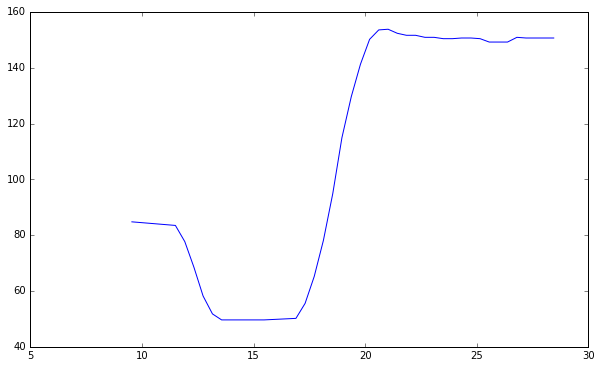

In [20]:
plt.figure(figsize=(10,6))
plt.plot(tiempos, posiciones)